### Import Libraries

In [42]:
import nltk
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.svm import SVC # Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, recall_score, precision_score

### Reading Train & Test Data

In [43]:
df_train = pd.read_csv('original_dataset/train.tsv', delimiter= '\t')
df_test = pd.read_csv('original_dataset/test.tsv', delimiter= '\t')

In [44]:
# Traning data
df_train.head()

,PID,Text_data,Label
0,train_pid_1,Waiting for my mind to have a breakdown once t...,moderate
1,train_pid_2,My new years resolution : I'm gonna get my ass...,moderate
2,train_pid_3,New year : Somone else Feeling like 2020 will ...,moderate
3,train_pid_4,"My story I guess : Hi, Im from Germany and my ...",moderate
4,train_pid_5,Sat in the dark and cried myself going into th...,moderate


In [45]:
# Testing data
df_test.head()

,Pid,text data,Class labels
0,test_pid_1,Im scared : This is it. I lie to myself every ...,moderate
1,test_pid_2,New to this but just wanted to vent : I just f...,moderate
2,test_pid_3,I’m sad : It’s kinda always been an issue. I w...,moderate
3,test_pid_4,Lonely but not alone. : All of my immediately ...,moderate
4,test_pid_5,This year has been trash. : I dont know why I’...,moderate


In [46]:
# Shape of Traning and Testing Data Frames
print('Shape of Train Data Frame:', df_train.shape)
print('Shape of Test Data Frame :', df_test.shape)

Shape of Train Data Frame: (8891, 3)
Shape of Test Data Frame : (3245, 3)


In [47]:
# Null values
print('Sum of null values in Traning data = ', df_train.isna().sum().sum())
print('Sum of null values in Testing data = ', df_test.isna().sum().sum())

Sum of null values in Traning data =  0
Sum of null values in Testing data =  0


### Data Preprocessing
* Lowercase Converiosn
* Removing Special Characters
* Removal of Numeric values
* Removing stopwords
* Lemmatization

#### Lowercase Converiosn

In [48]:
df_train['Text_data'] = df_train['Text_data'].apply(
    lambda x: " ".join(x.lower() for x in x.split()))

df_test['text data'] = df_test['text data'].apply(
    lambda x: " ".join(x.lower() for x in x.split()))

#### Removing Special Characters

In [49]:
df_train['Text_data']= df_train['Text_data'].str.replace('[^\w\s]', ' ')
df_test['text data']= df_test['text data'].str.replace('[^\w\s]', ' ')  

#### Removal of Numeric values

In [50]:
df_train['Text_data'] = df_train['Text_data'].str.replace('\d+',' ') # removing numeric values from between the words
df_train['Text_data'] = df_train['Text_data'].str.replace('_',' ') # Removing underscores
df_test['text data'] = df_test['text data'].str.replace('\d+',' ') # removing numeric values from between the words
df_test['text data'] = df_test['text data'].str.replace('_',' ') # Removing underscores

#### Removing stopwords

In [51]:
stop = stopwords.words('english')

df_train['Text_data'] = df_train['Text_data'].apply( 
    lambda x: " ".join(x for x in x.split() if x not in stop))

df_test['text data'] = df_test['text data'].apply( 
    lambda x: " ".join(x for x in x.split() if x not in stop))

#### Lemmatization

In [52]:
stemmer = WordNetLemmatizer() # converting words to their dictionary form
df_train['Text_data'] = [stemmer.lemmatize(word) for word in df_train['Text_data']] 
df_test['text data'] = [stemmer.lemmatize(word) for word in df_test['text data']] 

### Data Visualization

Text(0.5, 0.98, 'Depression analysis on Traning data')

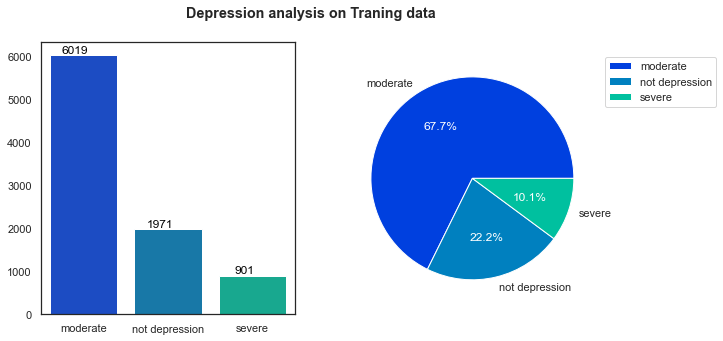

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
x= df_train['Label'].value_counts().index
y= df_train['Label'].value_counts().values.tolist()
data = df_train.groupby("Label").size()
sns.set(style = 'white', color_codes=True)
pal = sns.color_palette("winter", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.00 for i in df_train['Label'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Depression analysis on Traning data',weight = 'bold')

In [54]:
df_train['Label'] = df_train['Label'].replace({'moderate': 0, 'not depression': 1, 'severe': 2})
df_test['Class labels'] = df_test['Class labels'].replace({'moderate': 0, 'not depression': 1, 'severe': 2})

### Vectorization

In [55]:
# CountVectorizer
vectorizer = CountVectorizer(max_features=1000) 
x_train = vectorizer.fit_transform(df_train['Text_data']).toarray()
x_test = vectorizer.fit_transform(df_test['text data']).toarray()

In [56]:
y_train = df_train['Label']
y_test = df_test['Class labels']

In [57]:
print('Shape of Train data:', x_train.shape)
print('Shape of Test data:', x_test.shape)

Shape of Train data: (8891, 1000)
Shape of Test data: (3245, 1000)


### Model Developement

In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# deep learning model initialization
model = tf.keras.models.Sequential()  
model.add(Dense(1000,input_shape=(1000,),activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

x_train = model.predict(x_train)
x_test = model.predict(x_test)

102/102 [==============================] - 1s 8ms/step


In [59]:
print('Train data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

Train data shape: (8891, 15)
Test data shape: (3245, 15)


### KNN

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
knn_acc = 100 * round(accuracy_score(y_test, knn_pred), 2)
knn_pre = round(precision_score(y_test, knn_pred, average= 'weighted'), 2)
knn_rec = round(recall_score(y_test, knn_pred, average= 'weighted'), 2)
knn_f1 = round(f1_score(y_test, knn_pred, average= 'weighted'), 2)
print('\033[47m' + 'Classification Report\n\n' + '\033[0m' + '\033[31m', classification_report(y_test, knn_pred))

Classification Report

               precision    recall  f1-score   support

           0       0.68      0.66      0.67      2169
           1       0.29      0.29      0.29       848
           2       0.09      0.12      0.10       228

    accuracy                           0.52      3245
   macro avg       0.35      0.35      0.35      3245
weighted avg       0.53      0.52      0.53      3245



### Decision Tree

In [61]:
dt_model = DecisionTreeClassifier(max_depth=10)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
dt_acc = 100 * round(accuracy_score(y_test, dt_pred), 2)
dt_pre = round(precision_score(y_test, dt_pred, average = 'micro'), 2)
dt_rec = round(recall_score(y_test, dt_pred, average = 'micro'), 2)
dt_f1 = round(f1_score(y_test, dt_pred, average = 'micro'), 2)
print('\033[47m' + 'Classification Report\n\n' + '\033[0m' + '\033[35m', classification_report(y_test, dt_pred))

Classification Report

               precision    recall  f1-score   support

           0       0.68      0.76      0.72      2169
           1       0.33      0.24      0.28       848
           2       0.10      0.09      0.10       228

    accuracy                           0.58      3245
   macro avg       0.37      0.36      0.36      3245
weighted avg       0.55      0.58      0.56      3245



### Random Forest

In [62]:
# model initialization
clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
clf = clf.fit(x_train, y_train)
rf_pred = clf.predict(x_test)
rf_acc = 100 * round(accuracy_score(y_test, rf_pred), 2)
rf_pre = round(precision_score(y_test, rf_pred, average= 'weighted'), 2)
rf_rec = round(recall_score(y_test, rf_pred, average= 'weighted'), 2)
rf_f1 = round(f1_score(y_test, rf_pred, average= 'weighted'), 2)
print('\033[47m' + 'Classification Report\n\n' + '\033[0m' + '\033[34m', classification_report(y_test, rf_pred))

Classification Report

               precision    recall  f1-score   support

           0       0.68      0.90      0.78      2169
           1       0.39      0.16      0.23       848
           2       0.27      0.01      0.03       228

    accuracy                           0.65      3245
   macro avg       0.45      0.36      0.34      3245
weighted avg       0.58      0.65      0.58      3245



### Support Vector

In [63]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(x_test)
svc_acc = 100 * round(accuracy_score(y_test, svc_pred), 2)
svc_pre = round(precision_score(y_test, svc_pred, average= 'weighted'), 2)
svc_rec = round(recall_score(y_test, svc_pred, average= 'weighted'), 2)
svc_f1 = round(f1_score(y_test, svc_pred, average= 'weighted'), 2)
print('\033[47m' + 'Classification Report\n\n' + '\033[0m' + '\033[32m', classification_report(y_test, svc_pred))

Classification Report

               precision    recall  f1-score   support

           0       0.67      1.00      0.80      2169
           1       0.00      0.00      0.00       848
           2       0.00      0.00      0.00       228

    accuracy                           0.67      3245
   macro avg       0.22      0.33      0.27      3245
weighted avg       0.45      0.67      0.54      3245



### Accuracy Comparison

In [77]:
acc_models = {'Models': ['Decision Tree', 'Random Forest', 'KNeighbours', 'Support Vector'],
             'Accuracy': [dt_acc, rf_acc, knn_acc, svc_acc],
             'Precision': [dt_pre, rf_pre, knn_pre, svc_pre],
             'Recall': [dt_rec, rf_rec, knn_rec, svc_rec],
             'F1-score': [dt_f1, rf_f1, knn_f1, svc_f1]}
df_acc = pd.DataFrame(acc_models)
df_acc.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Decision Tree,58.0,0.58,0.58,0.58
1,Random Forest,65.0,0.58,0.65,0.58
2,KNeighbours,52.0,0.53,0.52,0.53
3,Support Vector,67.0,0.45,0.67,0.54


### Confusion matrix

<AxesSubplot:>

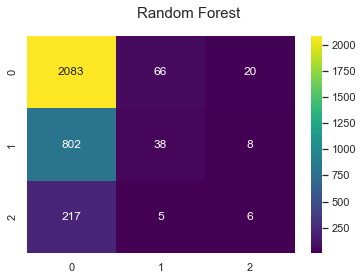

In [241]:
plt.suptitle('Random Forest', fontsize = 15)
sns.heatmap(confusion_matrix(y_test, rf_pred),annot=True, fmt='g',cmap='viridis')

<AxesSubplot:>

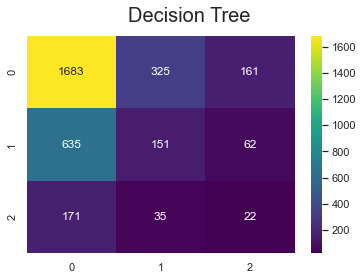

In [240]:
plt.suptitle('Decision Tree', fontsize = 20)
sns.heatmap(confusion_matrix(y_test, dt_pred),annot=True, fmt='g',cmap='viridis')

<AxesSubplot:>

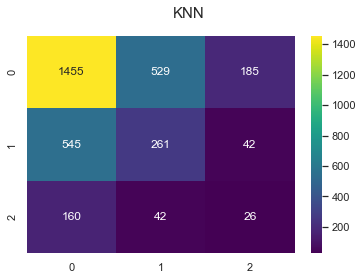

In [239]:
plt.suptitle('KNN', fontsize = 15)
sns.heatmap(confusion_matrix(y_test, knn_pred),annot=True, fmt='g',cmap='viridis')

<AxesSubplot:>

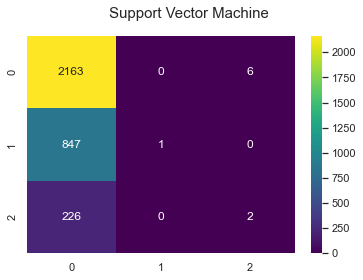

In [237]:
plt.suptitle('Support Vector Machine', fontsize = 15)
sns.heatmap(confusion_matrix(y_test, svc_pred),annot=True, fmt='g',cmap='viridis')